### Importing Libraries

In [288]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

#Classification Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
#from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
#You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#comment

### importing DataSet

In [289]:
train_data = pd.read_csv("train.csv")
train_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [290]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explore Dataset

In [291]:
train_data.shape
#Training dataset has 891 examples with 11 features and 1 target label in column 'Survived'

(891, 12)

In [292]:
test_data.shape
#Test dataset has 418 samples with same 11 features as training set. And it doesn't have survived column

(418, 11)

In [293]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [294]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [295]:
train_data.info()
#some columns have missing values


#object columns is 
# Name         891 non-null    object
# Sex          891 non-null    object 
# Ticket       891 non-null    object
# Cabin        204 non-null    object 
# Embarked     889 non-null    object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [296]:
train_data["Survived"].unique()

array([0, 1], dtype=int64)

In [297]:
train_data["Survived"].value_counts()
# zero not survived 
# 1 survived

0    549
1    342
Name: Survived, dtype: int64

In [298]:
s = train_data.columns
for i in s :
    print(i , len(train_data[i].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


In [299]:
train_data["Ticket"].value_counts()

347082               7
CA. 2343             7
1601                 7
3101295              6
347088               6
                    ..
PC 17612             1
PC 17603             1
693                  1
STON/O 2. 3101269    1
19952                1
Name: Ticket, Length: 681, dtype: int64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

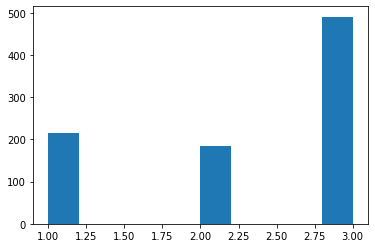

In [300]:
plt.hist(train_data["Pclass"])

<BarContainer object of 891 artists>

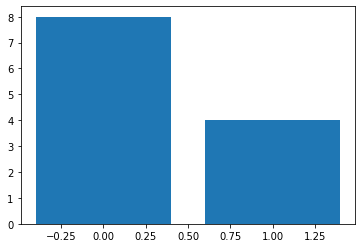

In [301]:
#    SibSp        891 non-null    int64  
#  7   Parch        891 non-null 
plt.bar(train_data["Survived"] , train_data["SibSp"])

<BarContainer object of 891 artists>

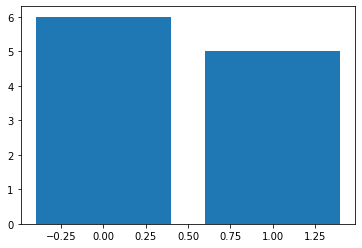

In [302]:
plt.bar(train_data["Survived"] , train_data["Parch"])

In [303]:
train_data.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

### Filling missing values 

In [304]:
print("no. of missing train data in Embarked" , train_data.Embarked.isna().sum())
print("no. of missing test data in Embarked" , test_data.Embarked.isna().sum())

no. of missing train data in Embarked 2
no. of missing test data in Embarked 0


In [305]:
print("no. of missing train data in fare" , train_data.Fare.isna().sum())
print("no. of missing test data in fare" , test_data.Fare.isna().sum())

no. of missing train data in fare 0
no. of missing test data in fare 1


### Amount of missing data in both columns is insignificant. We will just fill them with most frequent value for Embarked and mean value for Fare

In [306]:
test_data.Fare.unique()#we will fill by mean value 

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [307]:
# test_data.Embarked.unique()
dups = train_data.pivot_table(index = ['Embarked'], aggfunc ='size')
print(dups)#we will fill with s the most frequent

Embarked
C    168
Q     77
S    644
dtype: int64


In [308]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].mean())

In [309]:
train_data.Age.describe()
#Maximum age is 80, and minimum age is 0.42, conseqeuntly there is no unusual values for this column .

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [310]:
# check variable Age for missing values:
print(train_data.Age.isnull().sum())
print(test_data.Age.isnull().sum())


177
86


In [311]:
# dups = train_data.pivot_table(index = ['Age'], aggfunc ='size')
# print(dups)

In [312]:
# 1. create feature to show rows with missing values of age:
train_data['Age_NA'] =np.where(train_data.Age.isnull(), 1, 0)
test_data['Age_NA'] =np.where(test_data.Age.isnull(), 1, 0)
#if age is nan we will add 1 else we add 0 

In [313]:
# train_data.head(20)

0    714
1    177
Name: Age_NA, dtype: int64


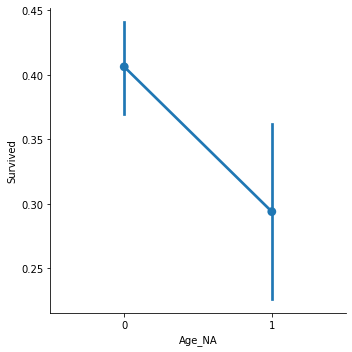

In [314]:
 # visualize Age_NA vs survival rate
print(train_data["Age_NA"].value_counts())
sns.factorplot('Age_NA','Survived', data=train_data)
#According to the plot survival rate for people with missing Age is lower than for people that have age value.
#TRAThis information is representative as there is enough samples for both cases: 714 and 177, 
#therefore we will keep Age_NA variable for future use.

<AxesSubplot:ylabel='Frequency'>

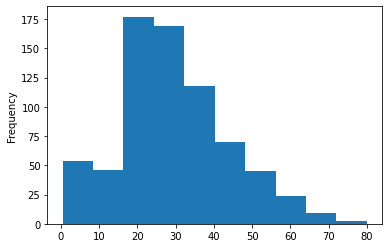

In [315]:
train_data.Age.plot.hist()#data likes normal distribution so we will fill age by mean

In [316]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].mean())

<AxesSubplot:ylabel='Frequency'>

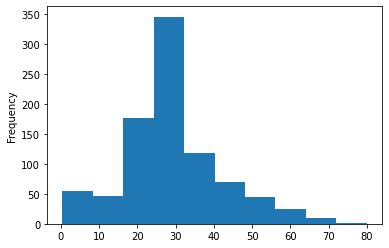

In [317]:
train_data.Age.plot.hist()

<AxesSubplot:ylabel='Frequency'>

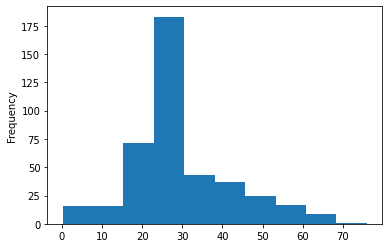

In [318]:
test_data.Age.plot.hist()

### Features with High Cardinality(a lot of categories)

In [319]:
s = train_data.columns
for i in s :
    print(i , len(train_data[i].unique()))
    
#PassengerId 
#Name 
#Ticket 
#Cabin 

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 3
Age_NA 2


In [320]:
#PassengerId and name can be dropped as it is unique and represents ID for each passenger. 
train_data = train_data.drop(['PassengerId'], axis=1)
# test_data = test_data.drop(['PassengerId'], axis=1)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [321]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
 10  Age_NA    891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB


In [322]:
train_data.Ticket[:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [323]:
# test_data.Embarked.unique()
dups = train_data.pivot_table(index = ['Ticket'], aggfunc ='size')
print(dups)#we will fill with s the most frequent

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64


#### ticket type values has A/5, PC ,110152 ,110413 and so on not every ticket has associated type

we have discovered that ticket number: starting from 0 to 3101317.

For most of the tickets first number is associated with Pclass

except tickets that are less than 5 digits long or tickets than have ticket type associated with them



### We will create variable ticket_type:

In [324]:
#create function that takes ticket feature and returns list of ticket_types
def ticket_sep(data_ticket):
    ticket_type = []

    for i in range(len(data_ticket)):

            ticket =data_ticket.iloc[i]

            for c in string.punctuation:
                ticket = ticket.replace(c,"")#to remove any punctuation from ticket
                splited_ticket = ticket.split(" ")   
            if len(splited_ticket) == 1:
                ticket_type.append('NO')
            else: 
                ticket_type.append(splited_ticket[0])
    return ticket_type 

In [325]:
# we will create new feature in tarin data ==> ticket_type:
train_data["ticket_type"] = ticket_sep(train_data.Ticket)

train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,ticket_type
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,A5
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,PC


In [326]:
# and so on we will create new feature in test data ==> ticket_type:
test_data["ticket_type"] = ticket_sep(test_data.Ticket)
test_data.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,ticket_type
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,NO
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,0,NO


NO         665
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
A4           7
SCPARIS      7
SOC          6
STONO2       6
C            5
FCC          5
SCParis      4
SCAH         3
PP           3
SOPP         3
WEP          3
PPP          2
SWPP         2
SOTONO2      2
SCA4         1
SCOW         1
FC           1
SOP          1
AS           1
Fa           1
SC           1
SP           1
CASOTON      1
Name: ticket_type, dtype: int64


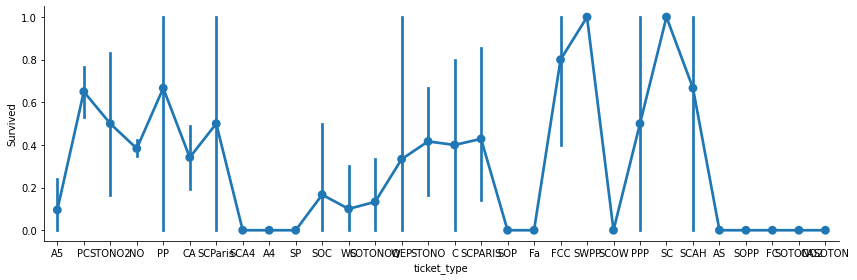

In [327]:
# check how many samples are there for each ticket type and visualize:
print(train_data["ticket_type"].value_counts())
sns.factorplot('ticket_type','Survived', data=train_data,size=4,aspect=3)

#### there are to many ticket types that are not representative ==> to make it representative we will put all ticket types that have less than 15 samples into 1 type 'other_T'

In [328]:
# #some experiments 
# t = train_data.Ticket
# for i in range(len(t)):
#     ticket = t.iloc[i]
#     #print(ticket)
#     for c in string.punctuation:
#         ticket = ticket.replace(c,"")
#         splited_ticket = ticket.split(" ")
#     print(splited_ticket)
#     #print(ticket)

            


In [329]:
# m = "pb,scr"
# for c in string.punctuation:
#     m = m.replace(c,"")
#     print(m)



In [330]:
# for those types that have less than 15 samples in training set, assign type to 'OTHER':

for t in train_data['ticket_type'].unique():
    if len(train_data[train_data['ticket_type']==t]) < 15:
        train_data.loc[train_data.ticket_type ==t, 'ticket_type'] = 'OTHER_T'
       
    
for t in test_data['ticket_type'].unique():
    if t not in train_data['ticket_type'].unique():
        test_data.loc[test_data.ticket_type ==t, 'ticket_type'] = 'OTHER_T'
        
print(train_data['ticket_type'].unique())
print(test_data['ticket_type'].unique())

['A5' 'PC' 'OTHER_T' 'NO' 'CA' 'SOTONOQ']
['NO' 'OTHER_T' 'PC' 'A5' 'CA' 'SOTONOQ']


NO         0.746352
OTHER_T    0.099888
PC         0.067340
CA         0.046016
A5         0.023569
SOTONOQ    0.016835
Name: ticket_type, dtype: float64


<AxesSubplot:xlabel='ticket_type', ylabel='Survived'>

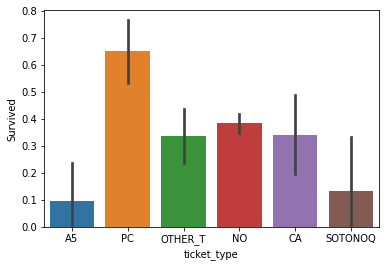

In [331]:
# visualize ticket_type vs survival rate
print(train_data["ticket_type"].value_counts()/len(train_data))
sns.barplot(x = 'ticket_type', y = 'Survived', data = train_data)

### as we have seen A5 and aotonoq tickets have the lowest survive ratio and the most rare category so we can combine them together 

In [332]:
# where ticket_type is 'SOTONOQ' convert it to 'A5'
train_data["ticket_type"] = np.where(train_data["ticket_type"]=='SOTONOQ', 'A5', train_data["ticket_type"])
test_data["ticket_type"] = np.where(test_data["ticket_type"]=='SOTONOQ', 'A5', test_data["ticket_type"])

NO         0.746352
OTHER_T    0.099888
PC         0.067340
CA         0.046016
A5         0.040404
Name: ticket_type, dtype: float64


<AxesSubplot:xlabel='ticket_type', ylabel='Survived'>

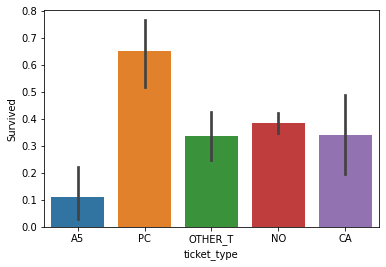

In [333]:
# visualize ticket_type vs survival rate
print(train_data["ticket_type"].value_counts()/len(train_data))
sns.barplot(x = 'ticket_type', y = 'Survived', data = train_data)

In [334]:
# we will now drop Ticket from dataset:

train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [335]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NA,ticket_type
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,A5
1,1,1,female,38.0,1,0,71.2833,C85,C,0,PC


In [336]:
print('No. of missing values in Train set:', train_data.Cabin.isnull().sum())
print('No. of missing values in Test set:', test_data.Cabin.isnull().sum())

No. of missing values in Train set: 687
No. of missing values in Test set: 327


#### 1. Variable Cabin has a lot of missing values both in train and test set. As there are a lot of missing values it worth to separate missing values from all other cabin types and check how it relates with other variables and target.


2. Variable in column Cabin has following structure:  
    - deck : Letter in front of number 
    - cabin number 
Deck probably has impact on survival rate. 

We will Create 'cabin_type' feature

In [337]:
#create function that takes cabin from dataset and extracts cabin type for each cabin that is not missing.
# If cabin is missing, leaves missing value:

def cabin_sep(data_cabin):
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True: 
                cabin_type.append('NaN') 
            else:    
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1]) 
            
    return cabin_type

In [338]:
# apply cabin sep on test and train set:
train_data['cabin_type'] = cabin_sep(train_data.Cabin)
test_data['cabin_type'] = cabin_sep(test_data.Cabin)


train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NA,ticket_type,cabin_type
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,A5,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,0,PC,C


NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: cabin_type, dtype: int64


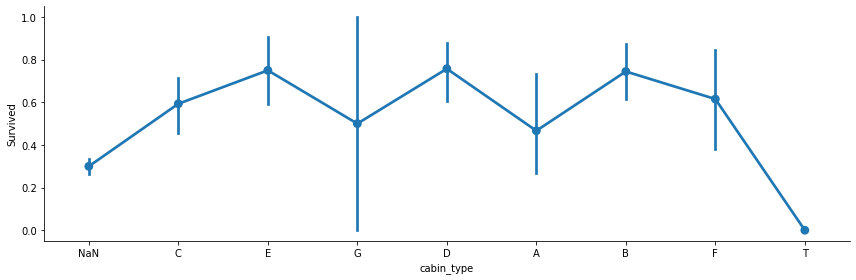

In [339]:
# visualize cabin_type vs survival rate:
print(train_data["cabin_type"].value_counts())
sns.factorplot('cabin_type','Survived', data=train_data,size=4,aspect=3)

##### In order to make data representative we will put all cabin types in train data that have less tan 15 samples into separate type 'OTHER_C'. For test set we will also only leave cabin types that are left in training set and keep the rest under 'OTHER_C' type


In [340]:
# for those types that have less than 15 samples in training set, assign type to 'OTHER_C':

for t in train_data['cabin_type'].unique():
    if len(train_data[train_data['cabin_type']==t]) <= 15:
        train_data.loc[train_data.cabin_type ==t, 'cabin_type'] = 'OTHER_C'
       
    
for t in test_data['cabin_type'].unique():
    if t not in train_data['cabin_type'].unique():
        test_data.loc[test_data.cabin_type ==t, 'cabin_type'] = 'OTHER_C'
        
print(train_data['cabin_type'].unique())
print(test_data['cabin_type'].unique())

['NaN' 'C' 'E' 'OTHER_C' 'D' 'B']
['NaN' 'B' 'E' 'OTHER_C' 'C' 'D']


NaN        0.771044
C          0.066218
B          0.052750
OTHER_C    0.037037
D          0.037037
E          0.035915
Name: cabin_type, dtype: float64


<AxesSubplot:xlabel='cabin_type', ylabel='Survived'>

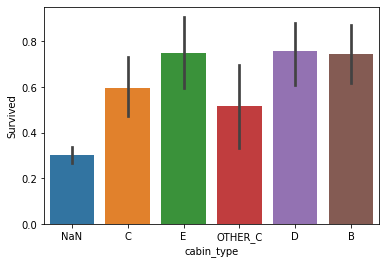

In [341]:
# visualize cabin_type vs survival rate
print(train_data["cabin_type"].value_counts()/len(train_data))
sns.barplot(x = 'cabin_type', y = 'Survived', data = train_data)

In [342]:
# we will now drop cabin from dataset:

train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [343]:
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,ticket_type,cabin_type
0,0,3,male,22.0,1,0,7.2500,S,0,A5,NaN
1,1,1,female,38.0,1,0,71.2833,C,0,PC,C


### Features with Outliers

<AxesSubplot:xlabel='Age'>

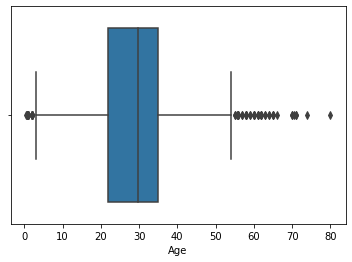

In [344]:
sns.boxplot(train_data.Age)

<AxesSubplot:xlabel='Fare'>

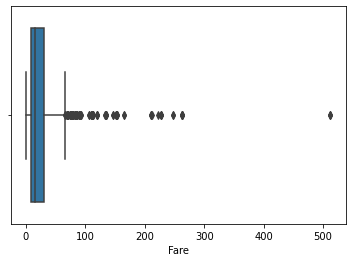

In [345]:
sns.boxplot(train_data.Fare)

#### All features have outliers. It can be dangerous for linear models.
The way to handle ourliers depends on distribution type. If distribution is close to normal --> bound values within 3std range, but if distribution is skewed --> bound between 3IQR range.

We already know that Age is close to normal

In [346]:
print('Skew for Fare:',train_data.Fare.skew())


Skew for Fare: 4.787316519674893


In [347]:
# calculate upper bound for Fair
IQR = train_data.Fare.quantile(0.75) - train_data.Fare.quantile(0.25)
upper_bound = train_data.Fare.quantile(0.75) + 3*IQR
# for train and test sets convert all values in column Fair where age is more than upper_bound to upper_bound:
train_data.loc[train_data.Fare >upper_bound, 'Fare'] = upper_bound 
test_data.loc[test_data.Fare >upper_bound, 'Fare'] = upper_bound

max(train_data.Fare)

100.2688

In [348]:
# calculate upper bound for Age:
upper_bound = train_data.Age.mean() + 3* train_data.Age.std()
# for train and test sets convert all values in column Fair where age is more than upper_bound to upper_bound:
train_data.loc[train_data.Age >upper_bound, 'Age'] = upper_bound 
test_data.loc[test_data.Age >upper_bound, 'Age'] = upper_bound

max(train_data.Age)

68.70516332506747

In [349]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,ticket_type,cabin_type
0,0,3,male,22.0,1,0,7.2500,S,0,A5,NaN
1,1,1,female,38.0,1,0,71.2833,C,0,PC,C
2,1,3,female,26.0,0,0,7.9250,S,0,OTHER_T,NaN
3,1,1,female,35.0,1,0,53.1000,S,0,NO,C
4,0,3,male,35.0,0,0,8.0500,S,0,NO,NaN


### Encoding data

In [350]:
#sex column 
train_data['Sex'] = train_data['Sex'].replace({'male':1, 'female':0})
test_data['Sex'] = test_data['Sex'].replace({'male':1, 'female':0})
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,ticket_type,cabin_type
0,0,3,1,22.0,1,0,7.2500,S,0,A5,NaN
1,1,1,0,38.0,1,0,71.2833,C,0,PC,C


In [351]:
train_data.ticket_type.value_counts()

NO         665
OTHER_T     89
PC          60
CA          41
A5          36
Name: ticket_type, dtype: int64

In [352]:
#sex column 
train_data['ticket_type'] = train_data['ticket_type'].replace({'NO':1, 'OTHER_T':2 ,'PC':3,'CA':4,'A5':5})
test_data['ticket_type'] = test_data['ticket_type'].replace({'NO':1, 'OTHER_T':2 ,'PC':3,'CA':4,'A5':5})
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,ticket_type,cabin_type
0,0,3,1,22.0,1,0,7.2500,S,0,5,NaN
1,1,1,0,38.0,1,0,71.2833,C,0,3,C


In [353]:
train_data.cabin_type.value_counts()

NaN        687
C           59
B           47
OTHER_C     33
D           33
E           32
Name: cabin_type, dtype: int64

In [354]:
#sex column 
train_data['cabin_type'] = train_data['cabin_type'].replace({'NaN':1, 'C':2 ,'B':3,'OTHER_C':4,'D':5 , 'E' : 6})
test_data['cabin_type'] = test_data['cabin_type'].replace({'NaN':1, 'C':2 ,'B':3,'OTHER_C':4,'D':5 , 'E' : 6})
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,ticket_type,cabin_type
0,0,3,1,22.0,1,0,7.2500,S,0,5,1
1,1,1,0,38.0,1,0,71.2833,C,0,3,2


In [355]:
#Embarked column will be by 1 hot encoder 
# Get one hot encoding of columns Embarked
one_hot = pd.get_dummies(train_data['Embarked'])
train_data = train_data.drop('Embarked',axis = 1)
train_data = train_data.join(one_hot)
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_NA,ticket_type,cabin_type,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,5,1,0,0,1
1,1,1,0,38.0,1,0,71.2833,0,3,2,1,0,0


In [356]:
#Embarked column will be by 1 hot encoder 
# Get one hot encoding of columns Embarked
one_hot = pd.get_dummies(test_data['Embarked'])
test_data = test_data.drop('Embarked',axis = 1)
test_data = test_data.join(one_hot)
test_data.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Age_NA,ticket_type,cabin_type,C,Q,S
0,892,3,1,34.5,0,0,7.8292,0,1,1,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,1,1,0,0,1


<AxesSubplot:title={'center':'Correlation of Features'}>

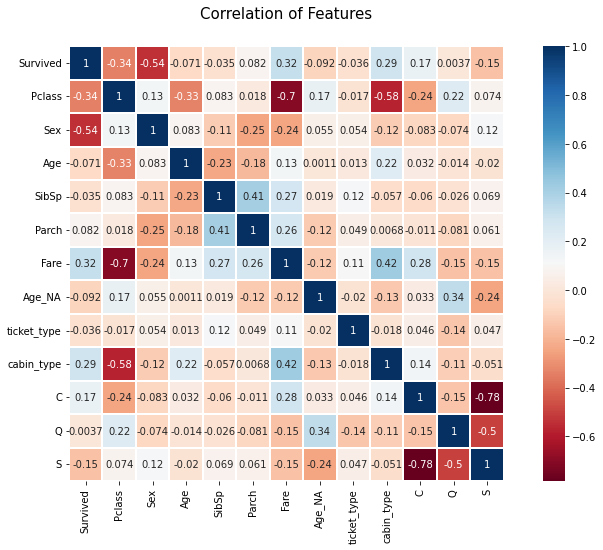

In [357]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,8))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

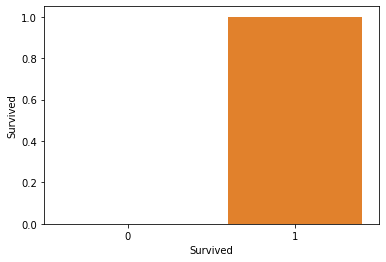

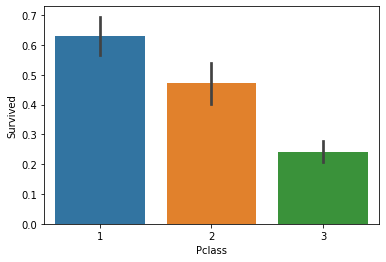

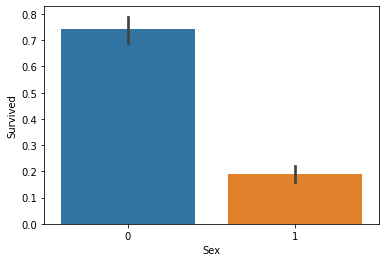

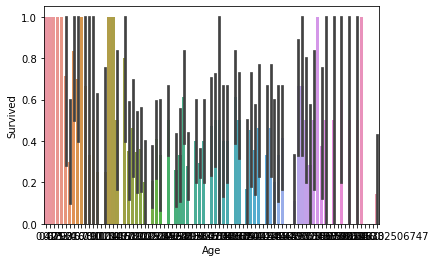

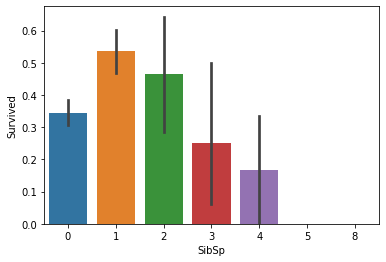

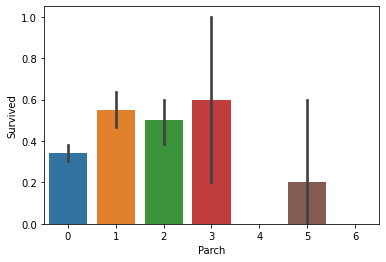

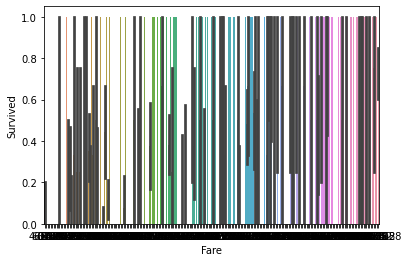

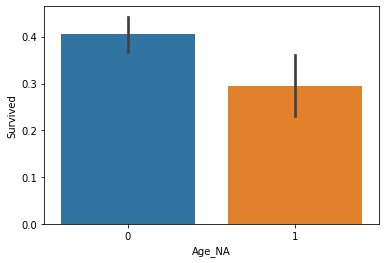

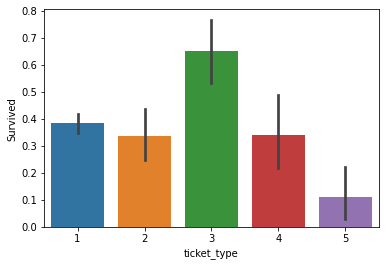

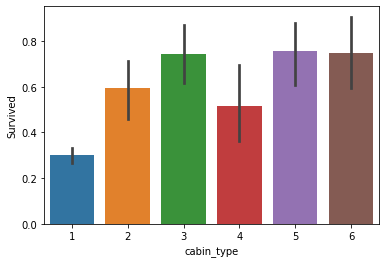

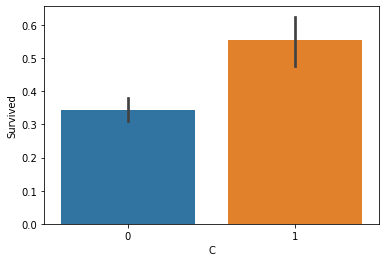

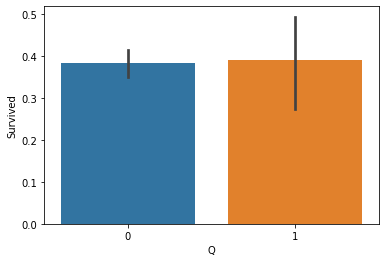

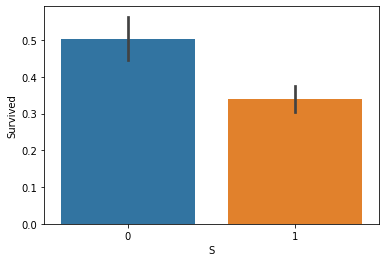

In [358]:
for col in train_data.columns:
    sns.barplot(x = col, y = 'Survived', data = train_data)
    plt.show()

### Split training data into training and validation sets

In [366]:
features = ['Pclass','Sex','SibSp','Parch','Fare','Age_NA','ticket_type','cabin_type','C','Q','S']


X_train, X_val, y_train, y_val = train_test_split(train_data[features],
                                                  train_data["Survived"],
                                                  test_size = 0.2,
                                                  stratify = train_data["Survived"],
                                                  random_state=0)

X_test = test_data[features]

X_train.head(2)


,Pclass,Sex,SibSp,Parch,Fare,Age_NA,ticket_type,cabin_type,C,Q,S
502,3,0,0,0,7.6292,1,1,1,0,1,0
464,3,1,0,0,8.0500,1,2,1,0,0,1


In [367]:
# from sklearn.svm import SVC
# svclassifier = SVC(C= 10 ,kernel="rbf" , gamma =.02 ,break_ties=True,random_state=10)
# svclassifier.fit(X_train, y_train)




SVC(C=10, break_ties=True, gamma=0.02, random_state=10)

In [368]:
# y_pred = svclassifier.predict(X_val)

In [369]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_val,y_pred))
# print(classification_report(y_val,y_pred))

[[90 20]
 [23 46]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.70      0.67      0.68        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



### precicion of class zero means if model predicted 100 in class zero there is 78 of them is predicted true

### recall means of all data in zero class model predict 80% of them correct 

### accuracy means all predicted true over all data 



In [370]:
X_test.shape
X_train.shape

(712, 11)

In [377]:
best_rf = RandomForestClassifier(random_state=121, criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=50)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[100  10]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       110
           1       0.81      0.64      0.72        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



In [378]:
y_pred_test = best_rf.predict(X_test)


In [379]:
test_data['Survived'] = y_pred_test
test_data[['PassengerId','Survived']].to_csv('submission.csv', index=False)
